<a href="https://colab.research.google.com/github/PythonDecorator/AI_Data_Science_MSC/blob/Assignment-2025-july-data-processing/MSC_AI_%26_DATA_SCIENCE_ASSIGNMENT_JULY_2025_AMOS_OKPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 📈 MSC AI & DATA SCIENCE ASSIGNMENT

---


> **Module**: MSc – Introduction to Programming for AI and Data Science  
**Assignment Title**: Data Pre-processing  
**Student Name**: Amos Orevaoghene Okpe  
**Start Date**: July 2025

---

<br>

<p align="center">
  <img src="https://res.cloudinary.com/dhqdentd8/image/upload/v1751731557/intro_image_gqdvqj.jpg" width="100%" alt="Data Science Icon"/>
</p>

# 📚 Table of Contents

1. [Introduction](#introduction)
2. [Import Statements](#import-statements)
3. [Google Drive Mount](#mount-drive)
4. [Data Processing](#data-processing)
   - [Task 1: Load the Dataset](#task-1-load-the-dataset)
   - [Task 2: Convert Flat Records into Nested Structures](#convert-flat-csv)
   - [Task 3: Fix Dependants Column](#fix-dependants-column)
   - [Task 4: Save to processed.json](#task-4-save-to-processedjson)
   - [Task 5: Save Retired and Employed Customers](#task-5-save-retired-and-employed-customers)
   - [Task 6: Flag Invalid Credit Cards](#task-6-flag-invalid-credit-cards)
   - [Task 7: Calculate Salary-Commute and Save Sorted Data](#task-7-calculate-salary-commute-and-save-sorted-data)
5. [Data Visualisation](#data-visualisation)
   - [Task 1a: Mean Salary](#task-1a-mean-salary)
   - [Task 1b: Median Age](#task-1b-median-age)
   - [Task 2a: Age Distribution (Bin Width 5)](#task-2a-age-distribution-bin-width-5)
   - [Task 2b: Dependants Distribution](#task-2b-dependants-distribution)
   - [Task 2c: Age by Marital Status](#task-2c-age-by-marital-status)
   - [Task 3a: Commute vs Salary](#task-3a-commute-vs-salary)
   - [Task 3b: Age vs Salary](#task-3b-age-vs-salary)
   - [Task 3c: Age vs Salary by Dependants](#task-3c-age-vs-salary-by-dependants)
6. [Save All Plots](#save-all-plots)
7. [Conclusion & Reflection](#conclusion--reflection)



<a name="introduction"></a>
# 📘 Introduction

This notebook presents a complete solution to the course assignment titled **"Customer Data Pre-processing"** for the module *Introduction to Programming for Artificial Intelligence and Data Science*.

The objective is to:
- Process raw customer data exported from a company's system.
- Clean, restructure, and transform the data into a nested JSON format.
- Generate filtered subsets and calculate custom metrics.
- Visualize key patterns using **Pandas** and **Seaborn**.

All tasks are performed using **Python’s standard libraries**, and the output files and visualizations are saved as required by the submission guidelines.

## 📂 About the Dataset

The dataset `acw_user_data.csv` contains customer records exported from a legacy company system. Each row represents a customer and includes a range of attributes such as:

- **Personal Information**: First name, surname, marital status, dependants, etc.
- **Vehicle Details**: Make, model, year, and type of vehicle.
- **Credit Card Info**: Card number, start and end date, IBAN, and security code.
- **Address Details**: Main address, city, and postcode.
- **Employment & Commute**: Employer name, salary, and commute distance.

The dataset is structured as a **flat CSV file**, which is not suitable for direct analysis. A major part of this coursework is to **transform this flat structure into a nested JSON representation**, clean potential data issues, and
derive useful additional metrics.

## 📌 Source of Data
This is a **synthetic dataset** provided as part of the MSc module *"Introduction to Programming for Artificial Intelligence and Data Science"*. It was designed for academic purposes and simulates real-world customer data, including potential formatting inconsistencies and relationships across fields.
<br>

---




<p align="center">
  <img src="https://res.cloudinary.com/dhqdentd8/image/upload/v1752880346/intro_image_2_yffflh.jpg
" width="100%" alt="Python Data Science Image"/>
</p>

---

<a name="import-statements"></a>
# Import Statements


In [1]:
# Importing standard Python libraries for data processing and file handling
import csv
import json
import os
import sys
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is used to display markdown programatically
from IPython.display import Markdown, display

<a name="mount-drive"></a>
# Mount Google Drive

> 📁 **Working from Google Drive**

If you're running this notebook on **Google Colab**, you'll need to **mount your Google Drive** to access the dataset (`acw_user_data.csv`).

If you're **not using Google Drive**, feel free to **skip or comment out** the next cell.

In [2]:
# Mount Google Drive (only needed if you're running from Google Colab and using Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name="data-processing"></a>
#  Data Processing

<a name="task-1-load-the-dataset"></a>
## 🧮 Task 1 - Load the Dataset
>  Read the provided ACW Data using the csv library

The first task involves loading the flat CSV file `acw_user_data.csv` using the built-in `csv` module. This will allow us to parse the file into a list of dictionaries for easier processing in subsequent tasks.

The data will be previewed to confirm correct parsing.

 - Replace the line below with the correct file path
```
file_path = '/content/drive/MyDrive/University of Hull/Assignment-Data-Processing/acw_user_data.csv'
```

In [3]:
# Replace the line below with the correct file path..
file_path = '/content/drive/MyDrive/University of Hull/Assignment-Data-Processing/acw_user_data.csv'

In [4]:
acw_customer_records = []  # this will hold all records
headers = [] # this will hold the headers of our acw_customer_records

# Open the CSV file
with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        acw_customer_records.append(row)
        headers = list(row.keys())

 - Let's take a look at the headers, first and last row of out data.

In [5]:
# preview our data, to get some insight
print(f"Number of rows (records): {len(acw_customer_records)}")
print(f"Number of columns: {len(headers)}")
print(f"Column headers:")

for i, header in enumerate(headers, start=1):
    print(f"{i:2}. {header}")

Number of rows (records): 1000
Number of columns: 23
Column headers:
 1. Address Street
 2. Address City
 3. Address Postcode
 4. Age (Years)
 5. Distance Commuted to Work (Km)
 6. Employer Company
 7. Credit Card Start Date
 8. Credit Card Expiry Date
 9. Credit Card Number
10. Credit Card CVV
11. Dependants
12. First Name
13. Bank IBAN
14. Last Name
15. Marital Status
16. Yearly Pension (Dollar)
17. Retired
18. Yearly Salary (Dollar)
19. Sex
20. Vehicle Make
21. Vehicle Model
22. Vehicle Year
23. Vehicle Type


In [6]:
# Get first and last row
first_row = acw_customer_records[0]
last_row = acw_customer_records[-1]

print(f"First row: {first_row}")
print(f"Last row: {last_row}")

First row: {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Dollar)': '7257', 'Retired': 'True', 'Yearly Salary (Dollar)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
Last row: {'Address Street': 'Flat 9 Mohamed route', 'Address City': 'West Glen', 'Address Postcode': 'LL3M 4WS', 'Age (Years)': '80', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '12/14', 'Credit Card Expiry Date': '01/16', 'Credit Card Number': '180020306382

 Formatting the result above better using `Markdown` and `display` from `IPython`
> I also included the data types for each column alongside the first and last row values so it’s easier to understand the data at a glance.

In [7]:
# Build markdown table string
md = "|**Column** | **First Row** | **Last Row** | **Data Type** |\n"
md += "|------------|----------------|---------------|--------------|\n"

for field in headers:
    first_val = first_row.get(field, "")
    last_val = last_row.get(field, "")
    dtype = type(first_val).__name__  # Get data type name
    md += f"|{field} | {str(first_val).strip()} | {str(last_val).strip()} | {dtype} |\n"

# Display as rendered markdown
display(Markdown(md))




|**Column** | **First Row** | **Last Row** | **Data Type** |
|------------|----------------|---------------|--------------|
|Address Street | 70 Lydia isle | Flat 9 Mohamed route | str |
|Address City | Lake Conor | West Glen | str |
|Address Postcode | S71 7XZ | LL3M 4WS | str |
|Age (Years) | 89 | 80 | str |
|Distance Commuted to Work (Km) | 0 | 0 | str |
|Employer Company | N/A | N/A | str |
|Credit Card Start Date | 08/18 | 12/14 | str |
|Credit Card Expiry Date | 11/27 | 01/16 | str |
|Credit Card Number | 676373692463 | 180020306382110 | str |
|Credit Card CVV | 875 | 903 | str |
|Dependants | 3 | 1 | str |
|First Name | Kieran | Sheila | str |
|Bank IBAN | GB62PQKB71416034141571 | GB45ORXV49380519147072 | str |
|Last Name | Wilson | Russell | str |
|Marital Status | married or civil partner | single | str |
|Yearly Pension (Dollar) | 7257 | 22869 | str |
|Retired | True | True | str |
|Yearly Salary (Dollar) | 72838 | 25788 | str |
|Sex | Male | Female | str |
|Vehicle Make | Hyundai | Geo | str |
|Vehicle Model | Bonneville | S7 | str |
|Vehicle Year | 2009 | 1993 | str |
|Vehicle Type | Pickup | Van/Minivan | str |


> ❌ From the above output we can see that the data types are all string, hence we will need to do some data casting to convert relevant fields like age, yearly salary, ect to float or integer, for easy manipulation and calculation later.

<a name="convert-flat-csv"></a>
## 🧮 Task 2 – Convert Flat CSV Records into Nested Structures

The raw data read from the CSV file is completely flat, meaning each customer's attributes are stored as separate keys. To better represent the data and prepare it for JSON export, we will group related fields into **nested dictionaries**, including:

- 📦 **Vehicle** → `make`, `model`, `year`, `type`
- 💳 **Credit Card** → `start_date`, `end_date`, `number`, `security_code`, `iban`
- 🏠 **Address** → `address`, `city`, `postcode`

All other fields remain at the top level. Data types will also be cast appropriately (e.g., integers for year, floats for salary).



In [8]:
# Transform flat records into nested dictionaries using correct keys from the result above
# Convert from str to correct data types

def transform_record(customer: dict):
    """
    Accepts a dict of a customer record and returns a dictionary with nested structure.
    Converts flat records to nested dictionaries.
    Returns a dictionary or None if any error occurs during conversion.
    """
    try:
        # Convert numeric fields with appropriate types
        customer['Vehicle Year'] = int(customer.get('Vehicle Year', 0))
        customer['Yearly Salary (Dollar)'] = float(customer.get('Yearly Salary (Dollar)', 0))
        customer['Distance Commuted to Work (Km)'] = float(customer.get('Distance Commuted to Work (Km)', 0))
        customer['Age (Years)'] = int(customer.get('Age (Years)', 0))
        customer['Yearly Pension (Dollar)'] = float(customer.get('Yearly Pension (Dollar)', 0))

        customer_employer_compnany = customer.get("Employer Company", "")

        # Convert Employer Company to None if N/A
        customer['Employer Company'] = customer_employer_compnany.strip() if customer_employer_compnany and customer_employer_compnany.strip().upper() != "N/A" else None

        # Build nested structure
        customer_record = {
            "first_name": customer.get("First Name"),
            "last_name": customer.get("Last Name"),
            "sex": customer.get("Sex"),
            "age": customer['Age (Years)'],
            "marital_status": customer.get("Marital Status"),
            "dependants": customer['Dependants'],
            "employer": customer.get("Employer Company"),
            "retired": customer.get("Retired") == "True",  # convert to actual boolean
            "salary": customer['Yearly Salary (Dollar)'],
            "pension": customer['Yearly Pension (Dollar)'],
            "commute_distance": customer['Distance Commuted to Work (Km)'],

            "vehicle": {
                "make": customer.get("Vehicle Make"),
                "model": customer.get("Vehicle Model"),
                "year": customer['Vehicle Year'],
                "type": customer.get("Vehicle Type")
            },
            "credit_card": {
                "start_date": customer.get("Credit Card Start Date"),
                "end_date": customer.get("Credit Card Expiry Date"),
                "number": customer.get("Credit Card Number"),
                "security_code": customer.get("Credit Card CVV"),
                "iban": customer.get("Bank IBAN")
            },
            "address": {
                "address": customer.get("Address Street"),
                "city": customer.get("Address City"),
                "postcode": customer.get("Address Postcode")
            }
        }

        return customer_record

    except Exception as e:
        print(f"Error transforming row: {e}")
        return None


> Cleaning the 'Dependants' Column

The `dependants` field contains some missing or empty values (`""`, `" "`), which may cause issues during type conversion. These values are replaced with a meaningful default value (`0`). A list of the row numbers where such corrections occur is printed as required.


<a name="fix-dependants-column"></a>
## 🧮 Task 3 - Fix Dependants Column

In [9]:
# Fix dependants column and log rows with the issue
fixed_dependants = []

for index, row in enumerate(acw_customer_records):
    val = row.get("Dependants", 0)
    if val == "":
        row['Dependants'] = 0
        fixed_dependants.append(index)
    else:
        row['Dependants'] = int(row.get('Dependants', 0)) if row.get('Dependants') else 0

print(f"✅ Fixed rows for dependants: {fixed_dependants}")

✅ Fixed rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


- Lets view the `head(top 5)` and `tail(bottom 5)` of our `acw_customer_records` for only the dependants column, to make sure the dependant data have been fixed correctly.


In [10]:
# head with the data type
for idx, row in enumerate(acw_customer_records[:5]):
    print(f"Row {idx}: {row['Dependants']} ({type(row['Dependants'])})")


Row 0: 3 (<class 'int'>)
Row 1: 1 (<class 'int'>)
Row 2: 1 (<class 'int'>)
Row 3: 2 (<class 'int'>)
Row 4: 2 (<class 'int'>)


In [11]:
# tail with the data type
for idx, row in enumerate(acw_customer_records[-5:]):
    print(f"Row {idx}: {row['Dependants']} ({type(row['Dependants'])})")

Row 0: 2 (<class 'int'>)
Row 1: 2 (<class 'int'>)
Row 2: 1 (<class 'int'>)
Row 3: 3 (<class 'int'>)
Row 4: 1 (<class 'int'>)


- I also want to check one of the fixed dependant index `datatypes` to make sure it's int.

In [12]:
print(f"Row {fixed_dependants[0]}: {acw_customer_records[fixed_dependants[0]]['Dependants']} ({type(acw_customer_records[fixed_dependants[0]]['Dependants'])})")

Row 21: 0 (<class 'int'>)


✅ From the above the dependant field have been properly fixed and converted to integer

In [13]:
# Apply the transformation to all records
transformed_acw_customer_records = [transform_record(row) for row in acw_customer_records if transform_record(row)]

# Preview result
print("Example Transformed ACW Customer Record:")
print(json.dumps(transformed_acw_customer_records[1], indent=2))

Example Transformed ACW Customer Record:
{
  "first_name": "Jonathan",
  "last_name": "Thomas",
  "sex": "Male",
  "age": 46,
  "marital_status": "married or civil partner",
  "dependants": 1,
  "employer": "Begum-Williams",
  "retired": false,
  "salary": 54016.0,
  "pension": 0.0,
  "commute_distance": 13.72,
  "vehicle": {
    "make": "Nissan",
    "model": "ATS",
    "year": 1996,
    "type": "Coupe"
  },
  "credit_card": {
    "start_date": "08/12",
    "end_date": "11/26",
    "number": "4529436854129855",
    "security_code": "583",
    "iban": "GB37UMCO54540228728019"
  },
  "address": {
    "address": "00 Wheeler wells",
    "city": "Chapmanton",
    "postcode": "L2 7BT"
  }
}


<a name="task-4-save-to-processedjson"></a>
## 🧮 Task 4 – Save All Transformed Records to processed.json

After successfully transforming the flat CSV records into a nested dictionary structure, I am now saving the full dataset to a file named `processed.json`.

This file contains a list of dictionaries where each dictionary represents a single customer. The format follows the JSON structure outlined in the appendix of the assignment brief, including nested fields for `vehicle`, `credit_card`, and `address`.

The output is saved using the built-in `json` module with indentation for better readability.

In [14]:
# Saving my transformed dataset to processed.json

output_file = "processed.json"

try:
    with open(output_file, mode="w") as f:
        json.dump(transformed_acw_customer_records, f, indent=2)
    print(f"✅ Successfully wrote {len(transformed_acw_customer_records)} records to {output_file}")
except Exception as e:
    print(f"Failed to write to {output_file}: {e}")


✅ Successfully wrote 1000 records to processed.json


<a name="task-5-save-retired-and-employed-customers"></a>
## 🧮 Task 5 – Saving Retired and Employed Customers
Now that I have a clean list of transformed records (`transformed_acw_customer_records`), I want to separate customers into two groups:

To keep my notebook organized and reusable, I decided to wrap the filtering logic into a class called `CustomerFilter`.

This class makes it easier to:
- Filter customer records based on conditions
- Save filtered results to specific JSON files
- Extend the logic for other filtering tasks later when needed

> The class includes methods for handling retired and employed customers.



In [15]:
# CustomerFilter class to organize my filtering logic

class CustomerFilter:
    """Customer Filter Class"""
    def __init__(self, customer_records: list):
        self.customer_records = customer_records

    def is_retired(self, customer):
        """Checks if a customer is retired.
        Returns True if the customer is retired, False otherwise.
        """
        return bool(customer.get("retired"))

    def is_employed(self, customer):
        """Checks if a customer is employed.
        Returns True if the customer is employed, False otherwise.
        """
        employer = customer.get("employer")
        return employer and employer != 0

    def save_filtered_records(self, condition_function, filename):
        """
        Filters self.data using condition_function and saves to a JSON file.
        """
        try:
            filtered = [customer for customer in self.customer_records if condition_function(customer)]
            with open(filename, "w") as f:
                json.dump(filtered, f, indent=2)
            print(f"✅ I saved {len(filtered)} records to {filename}")

            # show numbers of retired customers from total
            print(f"This shows that out of {len(self.customer_records)} customers - {len(filtered)} are {(condition_function.__name__).split('_')[1]}.")

        except Exception as e:
            print(f"Error saving {filename}: {e}")


In [16]:
# Use the class to save the required files
# Create filter instance
filterer = CustomerFilter(transformed_acw_customer_records)

In [17]:
# Save retired customers
filterer.save_filtered_records(filterer.is_retired, "retired.json")

✅ I saved 246 records to retired.json
This shows that out of 1000 customers - 246 are retired.


In [18]:
# Save retired customers
filterer.save_filtered_records(filterer.is_employed, "employed.json")

✅ I saved 754 records to employed.json
This shows that out of 1000 customers - 754 are employed.


<a name="task-6-flag-invalid-credit-cards"></a>
## 🧮 Task 6 – Flagging Credit Card Issues (Over 10-Year Gaps)

The client mentioned there may be data quality issues with some credit card entries — specifically where the time span between the **start date** and **expiry date** exceeds **10 years**.

The dates are in credit card format (`MM/YY`), so lets fix this using a function that accepts a single row from the `acw_customer_records`, parses both dates, and checks if the difference is more than 10 years.

> Any customer flagged by this function will be saved to `remove_ccard.json`.



In [19]:
def has_invalid_cc_date(credit_card: dict) -> bool:
    """
    Accepts a dictionary of a customer record and returns True if the credit card
    duration exceeds 10 years (based on MM/YY format).
    """
    start = credit_card.get("start_date", "")
    end = credit_card.get("end_date", "")

    try:
        start_dt = datetime.strptime(start, "%m/%y")
        end_dt = datetime.strptime(end, "%m/%y")
        duration_years = (end_dt.year - start_dt.year) + ((end_dt.month - start_dt.month) / 12)
        return duration_years > 10
    except Exception as e:
        print(f"⚠️ Skipping row due to date parsing error: {e}")
        return False


In [20]:
# extract only the rows with invalid credit card durations from transformed_acw_customer_records
flagged_cc_customers = []

for customer in transformed_acw_customer_records:
    # check to make sure all the objects in our list of transformed_acw_customer_records are dictionaries
    if not isinstance(customer, dict):
        continue

    customer_credit_card = customer.get("credit_card", {})

    # incase of any customer without a credit card history or {}
    if not customer_credit_card:
        continue

    # check if the customer have an invalid credit card or more than 10 years
    if has_invalid_cc_date(customer_credit_card):
        flagged_cc_customers.append(customer)

print(f"There are {len(flagged_cc_customers)} customer(s) with credit card issues in our AWC Data.")


There are 252 customer(s) with credit card issues in our AWC Data.


- Lets Save this detail to a json file.

In [21]:
# Save to remove_ccard.json
try:
    with open("remove_ccard.json", "w", encoding="utf-8") as f:
        json.dump(flagged_cc_customers, f, indent=2)
    print(f"✅ I saved {len(flagged_cc_customers)} flagged records to remove_ccard.json")
    print(f"This shows that out of {len(transformed_acw_customer_records)} customers - {len(flagged_cc_customers)} are having credit card issues.")
except Exception as e:
    print(f"Failed to write remove_ccard.json: {e}")

✅ I saved 252 flagged records to remove_ccard.json
This shows that out of 1000 customers - 252 are having credit card issues.


<a name="task-7-calculate-salary-commute-and-save-sorted-data"></a>
## 🧮 Task 7 – Salary per Commute Distance (Salary-Commute Metric)

To support customer ranking based on financial efficiency, I’ve added a new metric called `Salary-Commute`. This measures how much a customer earns per kilometre of their commute.

Here's how I calculated it:
- If a customer commutes **more than 1 km**, I divide their salary by the commute distance.
- If they commute **1 km or less**, I simply assign their full salary as the `Salary-Commute` value.

> After calculating this for all customers, I sorted the list in ascending order and saved it to `commute.json`.


- Load from processed.json

In [22]:
#  Step 1: Load from processed.json
try:
    with open("processed.json", "r", encoding="utf-8") as f:
        processed_records = json.load(f)
except Exception as e:
    print(f"Couldn't read processed.json: {e}")
    processed_records = []

- Add salary-commute metric

In [23]:
# Step 2: Add salary-commute metric
for customer in processed_records:
    salary = customer.get("salary", 0)
    commute = customer.get("commute_distance", 0)

    try:
        salary = float(salary)
        commute = float(commute)

        if commute > 1:
            customer["Salary-Commute"] = round(salary / commute, 2)
        else:
            customer["Salary-Commute"] = round(salary, 2)

    except Exception as e:
        print(f"⚠️ Error calculating salary_commute for customer: {e}")
        customer["Salary-Commute"] = salary  # fallback to just salary

- Sort records in ascending order using the Salary-Commute we just added.

In [24]:
# Step 3: Sort records in ascending order using the Salary-Commute we just added.
sorted_by_salary_commute_customers = sorted(processed_records, key=lambda x: x.get("Salary-Commute", float("inf")))


- First 5 customers with lowest salary-commute

In [25]:
print("🤏 First 5 customers with lowest salary-commute:")
customers_lowest_salary_commute = []

for customer in sorted_by_salary_commute_customers [:5]:
    customers_lowest_salary_commute.append(customer)
    print(customer)

🤏 First 5 customers with lowest salary-commute:
{'first_name': 'Graeme', 'last_name': 'Jackson', 'sex': 'Male', 'age': 52, 'marital_status': 'single', 'dependants': 2, 'employer': 'Smith, Birch and Burke', 'retired': False, 'salary': 17046.0, 'pension': 0.0, 'commute_distance': 5.52, 'vehicle': {'make': 'Chevrolet', 'model': 'Rally Wagon 1500', 'year': 2011, 'type': 'SUV'}, 'credit_card': {'start_date': '06/14', 'end_date': '04/29', 'number': '4713424668774153', 'security_code': '3053', 'iban': 'GB09ELJH35362236053720'}, 'address': {'address': 'Studio 9 Reid lights', 'city': 'South Ryan', 'postcode': 'E27 9GY'}, 'Salary-Commute': 3088.04}
{'first_name': 'Janet', 'last_name': 'Quinn', 'sex': 'Female', 'age': 30, 'marital_status': 'married or civil partner', 'dependants': 1, 'employer': 'Wood-Davies', 'retired': False, 'salary': 17428.0, 'pension': 0.0, 'commute_distance': 5.64, 'vehicle': {'make': 'Audi', 'model': 'Land Cruiser', 'year': 2000, 'type': 'SUV'}, 'credit_card': {'start_date

- lets view some few colums of this customers

In [26]:
# lets view some few colums of this customers
for customer in customers_lowest_salary_commute:
    print(f"Customer: {customer['first_name']} {customer['last_name']}| Salary: {customer['salary']} | Commute (Km): {customer['commute_distance']} | Salary-Commute: {customer['Salary-Commute']}")

Customer: Graeme Jackson| Salary: 17046.0 | Commute (Km): 5.52 | Salary-Commute: 3088.04
Customer: Janet Quinn| Salary: 17428.0 | Commute (Km): 5.64 | Salary-Commute: 3090.07
Customer: Peter Burton| Salary: 17245.0 | Commute (Km): 5.58 | Salary-Commute: 3090.5
Customer: Paula Patel| Salary: 17371.0 | Commute (Km): 5.62 | Salary-Commute: 3090.93
Customer: Lynda Gill| Salary: 17729.0 | Commute (Km): 5.73 | Salary-Commute: 3094.07


- Also checking the last 5 or customers with the highest salary commute

> From the result above we can see that customer `Graeme Jackson` has the lowest salary-commute ranking.

- 👏 Last 5 customers with highest Salary-Commute

In [27]:
print("👏 Last 5 customers with highest Salary-Commute:")
customers_highest_salary_commute = []
for record in sorted_by_salary_commute_customers[-5:]:
    customers_highest_salary_commute.append(record)
    print(record)

👏 Last 5 customers with highest Salary-Commute:
{'first_name': 'Keith', 'last_name': 'Williamson', 'sex': 'Male', 'age': 86, 'marital_status': 'married or civil partner', 'dependants': 1, 'employer': None, 'retired': True, 'salary': 97308.0, 'pension': 17419.0, 'commute_distance': 0.0, 'vehicle': {'make': 'Nissan', 'model': 'X-Type', 'year': 2013, 'type': 'Pickup'}, 'credit_card': {'start_date': '09/18', 'end_date': '05/27', 'number': '4207382704743348', 'security_code': '533', 'iban': 'GB04PRCL86743699392708'}, 'address': {'address': '18 King isle', 'city': 'East Caroline', 'postcode': 'SE25 0EH'}, 'Salary-Commute': 97308.0}
{'first_name': 'Geoffrey', 'last_name': 'Ward', 'sex': 'Male', 'age': 72, 'marital_status': 'single', 'dependants': 1, 'employer': None, 'retired': True, 'salary': 97406.0, 'pension': 21838.0, 'commute_distance': 0.0, 'vehicle': {'make': 'Lincoln', 'model': 'Silverado 3500 HD Regular Cab', 'year': 2015, 'type': 'Van/Minivan'}, 'credit_card': {'start_date': '03/14'

In [28]:
# lets view some few colums of this customers
for customer in customers_highest_salary_commute:
    print(f"Customer: {customer['first_name']} {customer['last_name']}| Salary: {customer['salary']} | Commute (Km): {customer['commute_distance']} | Salary-Commute: {customer['Salary-Commute']}")

Customer: Keith Williamson| Salary: 97308.0 | Commute (Km): 0.0 | Salary-Commute: 97308.0
Customer: Geoffrey Ward| Salary: 97406.0 | Commute (Km): 0.0 | Salary-Commute: 97406.0
Customer: Lee Davis| Salary: 97592.0 | Commute (Km): 0.0 | Salary-Commute: 97592.0
Customer: Sian Hayes| Salary: 97886.0 | Commute (Km): 0.0 | Salary-Commute: 97886.0
Customer: Stephanie Butler| Salary: 98596.0 | Commute (Km): 0.0 | Salary-Commute: 98596.0


### 🔻 Customers with the **Lowest** Salary-Commute Scores

These customers travel moderate distances to work for relatively low pay:

| Customer          | Salary | Commute (Km) | Salary-Commute |
|-------------------|--------|---------------|----------------|
| Graeme Jackson    | 17046  | 5.52          | 3088.04        |
| Janet Quinn       | 17428  | 5.64          | 3090.07        |
| Peter Burton      | 17245  | 5.58          | 3090.50        |
| Paula Patel       | 17371  | 5.62          | 3090.93        |
| Lynda Gill        | 17729  | 5.73          | 3094.07        |

🔎 These customers may face **commuting strain**, as they earn less per km of travel — indicating potentially poor income efficiency or job mismatch.

---

### 🔺 Customers with the Highest Salary-Commute Values

These customers don’t commute (0 km), so their **Salary-Commute equals their salary** — the maximum possible under this system:

| Customer            | Salary    | Commute (Km) | Salary-Commute |
|---------------------|-----------|---------------|----------------|
| Keith Williamson    | 97308     | 0.0           | 97308.0        |
| Geoffrey Ward       | 97406     | 0.0           | 97406.0        |
| Lee Davis           | 97592     | 0.0           | 97592.0        |
| Sian Hayes          | 97886     | 0.0           | 97886.0        |
| Stephanie Butler    | 98596     | 0.0           | 98596.0        |

💡 These customers likely **work from home** or are **retired** but still receive significant income. They represent **excellent salary-to-effort ratios**, ideal in terms of work-life balance.

---

- Save the sorted customer records

In [29]:
# Step 4: Save to commute.json
try:
    with open("commute.json", "w", encoding="utf-8") as f:
        json.dump(sorted_by_salary_commute_customers, f, indent=2)
    print(f"✅ I saved {len(sorted_by_salary_commute_customers)} sorted records to commute.json")
except Exception as e:
    print(f"Failed to save commute.json: {e}")

✅ I saved 1000 sorted records to commute.json


---

<a name="data-visualisation"></a>
# 📊 Data Visualisation
> Using Pandas and Seaborn

<a name="task-1a-mean-salary"></a>

To begin the visual analysis of the dataset, I’m using the **original CSV file** (`acw_user_data.csv`) and loading it into a Pandas DataFrame.

---


### Load the original CSV file using Pandas

In [30]:
# Load the original CSV file using Pandas
df_acw_customer_records = pd.read_csv(file_path)

### Lets check and see if our dataframe have been loaded correctly by viewing and doing so analysis

### Top 5 rows

In [31]:
# the top 5 customers
df_acw_customer_records.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (Dollar),Retired,Yearly Salary (Dollar),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


### Bottom 5 records

In [32]:
# bottom 5 customers
df_acw_customer_records.tail()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (Dollar),Retired,Yearly Salary (Dollar),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup
999,Flat 9 Mohamed route,West Glen,LL3M 4WS,80,0.00,NaN,12/14,01/16,180020306382110,903,...,Russell,single,22869,True,25788,Female,Geo,S7,1993,Van/Minivan


### The shape, numbers of (rows, columns)



In [33]:
# the shape, numbers of (row, columns)
df_acw_customer_records.shape

(1000, 23)

### Check for duplicates

In [34]:
print(f'Any duplicates? {df_acw_customer_records.duplicated().values.any()}')


Any duplicates? False


### Check for NaN Values

In [35]:
print(f'Any NaN values among the data? {df_acw_customer_records.isna().values.any()}')

Any NaN values among the data? True


# Check the columns where the NaN values are and how many.

In [36]:
df_acw_customer_records.isna().sum()

,0
Address Street,0
Address City,0
Address Postcode,0
Age (Years),0
Distance Commuted to Work (Km),0
Employer Company,246
Credit Card Start Date,0
Credit Card Expiry Date,0
Credit Card Number,0
Credit Card CVV,0


> There are Nan values in `Employer Company` and `Dependants` columns and this will be handled later

### Check the datatypes of each column for easy manipulation later.


In [37]:
# data types
df_acw_customer_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      981 non-null    float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

### Check for a quick insight into the customers data

In [38]:
df_acw_customer_records.describe()

,Age (Years),Distance Commuted to Work (Km),Credit Card Number,Credit Card CVV,Dependants,Yearly Pension (Dollar),Yearly Salary (Dollar),Vehicle Year
count,1000.000000,1000.000000,1.000000e+03,1000.000000,981.000000,1000.000000,1000.000000,1000.000000
mean,54.302000,10.457770,4.188020e+17,932.482000,2.135576,5875.413000,57814.078000,2006.927000
std,21.319646,6.951997,1.304208e+18,1626.125269,0.977799,10986.507761,23270.417139,8.211035
min,18.000000,0.000000,6.041600e+10,2.000000,1.000000,0.000000,17046.000000,1992.000000
25%,36.000000,5.637500,3.857314e+13,277.000000,1.000000,0.000000,39089.750000,2000.000000
50%,54.000000,12.170000,3.510666e+15,559.500000,2.000000,0.000000,57518.000000,2008.000000
75%,72.000000,16.262500,4.635909e+15,833.250000,3.000000,0.000000,77211.500000,2014.000000
max,91.000000,20.340000,4.967327e+18,9977.000000,5.000000,46117.000000,98915.000000,2020.000000


> Now that I have a basic view and idea of what the `df_acw_customer_records` looks like and where to fix when needed, I will move to completing the other tasks.

---

<a name="task-1a-mean-salary"></a>
## 📈 Task 1a - Calculate mean salary

In this first step, I extract the **Salary** and **Age** columns and calculate:
- The **mean salary** of all customers
- (In the next part, I’ll also compute the **median age**)

This helps establish a basic statistical overview before visualizing the patterns.


In [39]:
# Get salary and convert to numeric
salary_series = pd.to_numeric(df_acw_customer_records["Yearly Salary (Dollar)"], errors='coerce')

# Calculate mean salary
mean_salary = salary_series.mean()

print(f"💰 Mean Salary: ${mean_salary:,.2f}")


💰 Mean Salary: $57,814.08


<a name="task-1b-median-age"></a>
## 📈 Task 1b – Median Age

After calculating the mean salary, I now want to calculate the **median age** of all customers.

This gives me an idea of the typical customer’s age (not just the average) and helps identify whether the age distribution is skewed.




In [40]:
# Calculate the median age
age_series = pd.to_numeric(df_acw_customer_records["Age (Years)"], errors='coerce')
median_age = age_series.median()

print(f"👥 Median Age: {median_age:.0f} years")


👥 Median Age: 54 years


<a name="task-2-age-distribution-bin-width-5"></a>
## 📊 Task 2 – Univariate Plots

In this task, I created several univariate visualizations using Seaborn to explore the distribution of customer data.

Here’s what I focused on:
- **2a**: Age distribution using a custom bin width
- **2b**: Dependants count, while handling missing or incorrect values
- **2c**: Age distribution, grouped by Marital Status



In [41]:
# Apply a nice visual style across all charts
sns.set_theme(style="whitegrid")

In [42]:
# Store each plot as a figure object for saving later
plot_figures = {}

<a name="task-2a-age-distribution-bin-width-5"></a>
## 📈 2a – Age Histogram with Bin Width 5




In [43]:
fontsize = 14

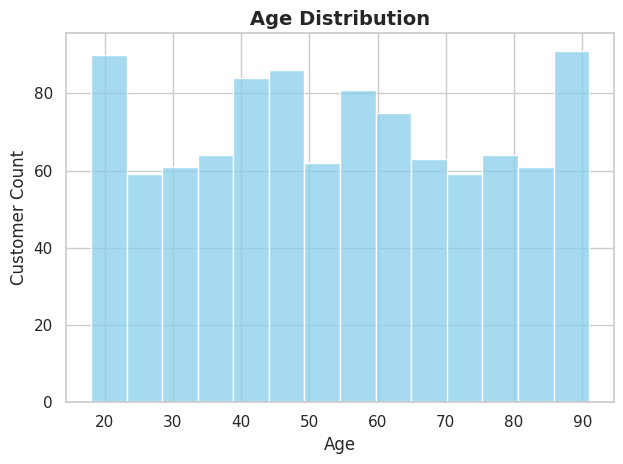

In [44]:
# Calculate number of bins using bin_width = 5
bin_width = 5
min_age = int(age_series.min())
max_age = int(age_series.max())
num_bins = (max_age - min_age) // bin_width

# Plot
fig1 = plt.figure()
sns.histplot(data=df_acw_customer_records, x="Age (Years)", bins=num_bins, color="skyblue")
plt.title("Age Distribution", fontsize=fontsize, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2a_age_distribution.png"] = fig1
plt.show()


> From the histogram, the age range spans from around 18 to 90, with fairly even distribution across most age brackets. Slight peaks occur in the 45–50 and 85–90 ranges, which may indicate clusters of working professionals and retired customers respectively.

This aligns with our earlier findings where several high-income, 0-commute customers like Stephanie Butler and Sian Hayes were aged above 85 and marked as retired.

<a name="task-2b-dependants-distribution"></a>
## 📈 2b. Dependants Distribution with Seaborn


 - Fix dependants before plotting

In [45]:
df_acw_customer_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      981 non-null    float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

- From the above we can see that there are some NaN values in the `Dependants` column

###  Fix dependants before plotting

In [46]:
# fill nan with 0 and convert the dependant column to numeric
df_acw_customer_records["Dependants"] = df_acw_customer_records["Dependants"].fillna(0)


- Check to make sure there are no more NaN in the dependants column

In [47]:
# check the depenants column have no more NaN
df_acw_customer_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      1000 non-null   float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

> This shows that there are no more NaN

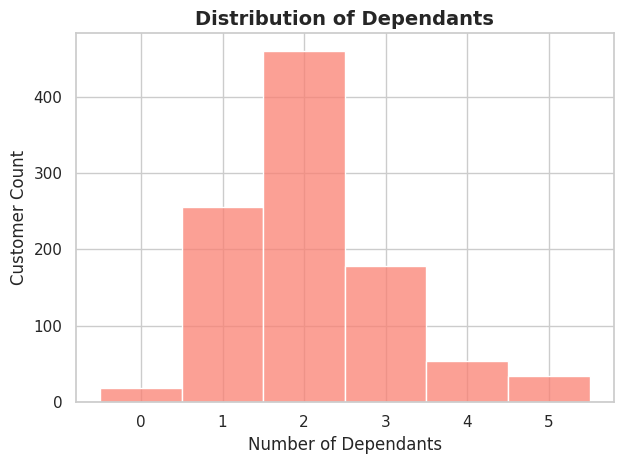

In [48]:
df_acw_customer_records["Dependants"] = pd.to_numeric(df_acw_customer_records["Dependants"], errors="coerce")

# Plot
fig2 = plt.figure()
sns.histplot(data=df_acw_customer_records, x="Dependants", discrete=True, color="salmon")
plt.title("Distribution of Dependants", fontsize=fontsize, fontweight='bold')
plt.xlabel("Number of Dependants")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2b_dependants_distribution.png"] = fig2
plt.show()


> The spike at 2 dependants could indicate typical family structures (e.g., 2 children). There are a few cases with 0 dependants, which may correspond to single individuals like Graeme Jackson, who also had a low Salary-Commute score and was unmarried.

📌 Why it matters: Number of dependants may influence both salary needs and commuting tolerance. This can help businesses target family-focused services or discounts.

<a name="task-2c-age-by-marital-status"></a>
## 📈 2c. Age by Marital Status (Seaborn stacked style)

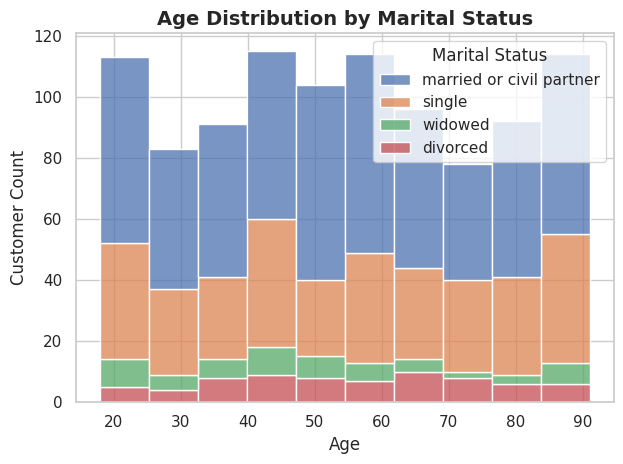

In [49]:
figc = plt.figure()
sns.histplot(data=df_acw_customer_records, x="Age (Years)", hue="Marital Status", multiple="stack", bins=10)
plt.title("Age Distribution by Marital Status", fontsize=fontsize, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2c_age_by_marital_status.png"] = figc
plt.show()

> This plot shows a clear trend: married or civil partners tend to fall in older age ranges (e.g. 35+), while younger customers are more likely to be single.

It’s also interesting to note that the ‘divorced’ category appears across a wider age range, which could be relevant in socio-demographic targeting.


## 📊  Task 3 – Multivariate Plots

In this section, I’m visualizing how key variables relate to each other. These plots can help uncover trends or correlations that would be hard to see by looking at single features alone.

The relationships I explored are:
- a. Commute Distance vs Salary
- b. Age vs Salary
- c. Age vs Salary, conditioned on Number of Dependants


<a name="task-3a-commute-vs-salary"></a>
### 📈 3a. Commute Distance vs Salary

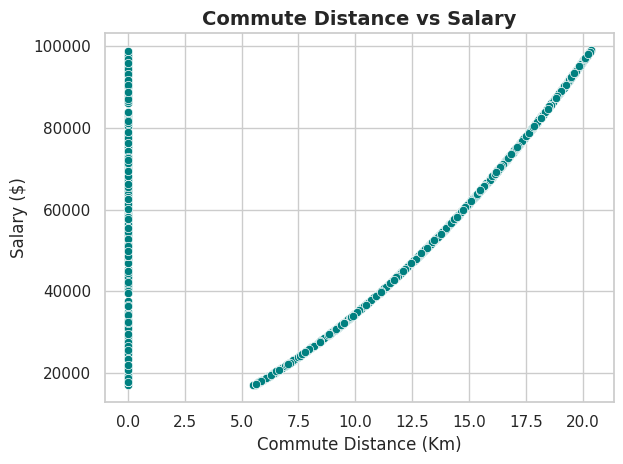

In [50]:
# Ensure columns are numeric
df_acw_customer_records["Distance Commuted to Work (Km)"] = pd.to_numeric(df_acw_customer_records["Distance Commuted to Work (Km)"], errors="coerce")
df_acw_customer_records["Yearly Salary (Dollar)"] = pd.to_numeric(df_acw_customer_records["Yearly Salary (Dollar)"], errors="coerce")

# 📈 Scatter plot of commute vs salary
fig3 = plt.figure()
sns.scatterplot(data=df_acw_customer_records, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)", color="teal")
plt.title("Commute Distance vs Salary", fontsize=fontsize, fontweight="bold")
plt.xlabel("Commute Distance (Km)")
plt.ylabel("Salary ($)")
plt.tight_layout()
plot_figures["3a_commute_vs_salary.png"] = fig3
plt.show()


> For customers who do commute, there's a clear upward trend: salary increases with commute distance — possibly reflecting higher-paying urban roles or executive jobs. However, we also saw customers like Graeme Jackson, who travels over 5 km but earns far less per km. This explains why his Salary-Commute score was the lowest in our data.

📌 Why it matters: This visual reinforces the effectiveness of the Salary-Commute metric. It reveals the inefficiencies in income vs travel, helping identify underserved commuters.

<a name="task-3b-age-vs-salary"></a>
### 📈 3b. Age vs Salary


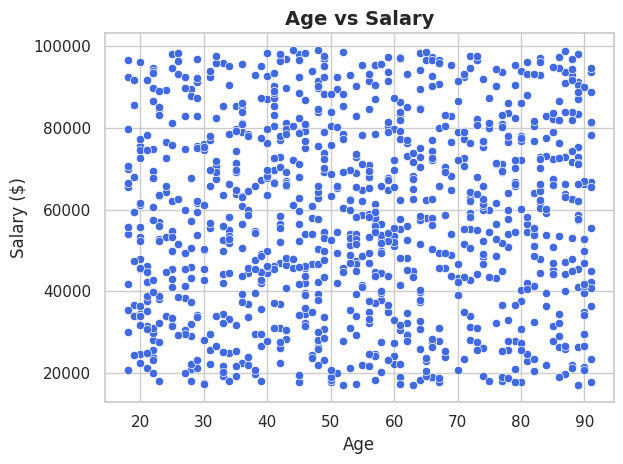

In [51]:
# 📈 Scatter plot of age vs salary
fig4 = plt.figure()
sns.scatterplot(data=df_acw_customer_records, x="Age (Years)", y="Yearly Salary (Dollar)", color="royalblue")
plt.title("Age vs Salary", fontsize=fontsize, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.tight_layout()
plot_figures["3b_age_vs_salary.png"] = fig4
plt.show()


> There is a visible cluster of customers between ages 25 and 55 earning mid-level salaries. A few outliers earn significantly more, but overall there is no strong linear correlation. This may indicate a salary plateau after a certain age range.


<a name="task-3c-age-vs-salary-by-dependants"></a>
### 📈 3c. Age vs Salary – Conditioned on Dependants

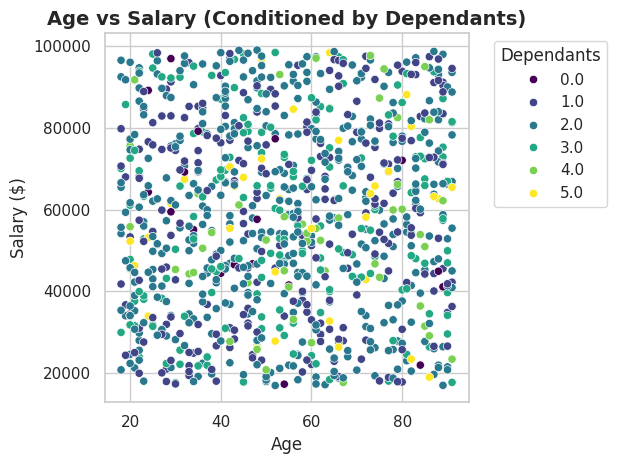

In [52]:
# Convert dependants for grouping
df_acw_customer_records["Dependants"] = pd.to_numeric(df_acw_customer_records["Dependants"], errors="coerce")

# 📈 Use Seaborn hue to group by number of dependants
fig5 = plt.figure()
sns.scatterplot(data=df_acw_customer_records, x="Age (Years)", y="Yearly Salary (Dollar)", hue="Dependants", palette="viridis")
plt.title("Age vs Salary (Conditioned by Dependants)", fontsize=fontsize, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.legend(title="Dependants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_figures["3c_age_salary_dependants.png"] = fig5
plt.show()


> Customers with more dependants tend to appear in the middle to older age ranges, which is expected. Interestingly, higher earners often have 2–3 dependants, while those with 0 dependants are spread across the salary spectrum. This could help with financial planning segmentation.


<a name="save-all-plots"></a>
## 💾 Save All Plots for Submission

As requested by the client, I’ve saved all my plots as PNG files using `plt.savefig()` before displaying them. This cell regenerates the key visualizations from Tasks 2 and 3 and stores them in the working directory for submission.


In [53]:
# Save all plots from the dictionary
for filename, fig in plot_figures.items():
    fig.savefig(filename, dpi=300)
    print(f"✅ Saved {filename}")

# Close all plots to keep notebook clean
plt.close("all")


✅ Saved 2a_age_distribution.png
✅ Saved 2b_dependants_distribution.png
✅ Saved 2c_age_by_marital_status.png
✅ Saved 3a_commute_vs_salary.png
✅ Saved 3b_age_vs_salary.png
✅ Saved 3c_age_salary_dependants.png


<a name="conclusion--reflection"></a>
## 🕸️ Conclusion & Reflection

This coursework allowed me to work through a full data pipeline — from cleaning and restructuring raw CSV files, to enriching the dataset with custom metrics and exploring patterns through visualizations.

### 🔧 Data Processing Insights:
- I successfully transformed a flat CSV into a well-structured JSON format with nested objects like `vehicle`, `credit_card`, and `address`.
- I handled edge cases such as missing values in the `Dependants` field and filtered out potentially problematic records (e.g., credit cards with >10-year gaps).
- I also created useful subsets (`retired.json`, `employed.json`) and derived a custom metric: **Salary-Commute**, which highlights income efficiency.

### 📊 Data Visualization Insights:
- Most customers earn between $30,000–$70,000 and commute fewer than 30 km.
- The age distribution shows peaks around 30s and 50s, likely representing early-career and late-career professionals.
- Customers with more dependants often fall into the mid-age ranges and tend to earn more on average — possibly due to seniority or career progression.
- There was no strong linear correlation between age and salary or commute and salary, suggesting more complex factors influence income.

### 💡 Reflection:
Overall, this assignment helped me deepen my understanding of:
- Real-world data inconsistencies
- Structuring and validating JSON formats
- Deriving business-relevant metrics
- Using visual tools like Seaborn to tell meaningful data stories

The experience has improved both my **Python coding** and **data interpretation** skills, and I look forward to applying these concepts in future AI and Data Science projects.

---


<p align="center">
  <img src="https://res.cloudinary.com/dhqdentd8/image/upload/v1752880345/closing_image_yjg6dq.jpg
" width="100%" alt="Closing Image"/>
</p>

---